In [1]:
%matplotlib inline
import pandas as pd
from sklearn import metrics, model_selection, ensemble
import matplotlib.pyplot as plt

df = pd.read_csv('all_treated_DB.csv', sep = '\t', index_col=0)
df = df.drop(df.index[df['total_annual_cost'] > 50000000])
df = df.drop(df.index[df['monthly_rent'] > 3000000])
df.head()

,name,ward,floor_plan,plan_DK,plan_L,plan_K,plan_S,age,story,floor,...,station_name3,rent,admin_fee,shikikin,reikin,hoshokin,shokyaku,monthly_rent,total_initial_cost,total_annual_cost
0,東京メトロ東西線 九段下駅 2階建 築6年,千代田,1,0,0,0,0,6.0,2.0,1.0,...,竹橋駅,40000,0.0,0,0,0,0,40000.0,0,480000.0
1,東京メトロ銀座線 末広町駅 5階建 築47年,千代田,1,0,0,0,0,47.0,5.0,5.0,...,湯島駅,50000,7000.0,50000,50000,0,50000,57000.0,150000,834000.0
2,東京メトロ銀座線 末広町駅 5階建 築47年,千代田,1,0,0,0,0,47.0,5.0,5.0,...,湯島駅,50000,7000.0,0,0,0,0,57000.0,0,684000.0
3,La Maison 神田（旧宮本ビル）,千代田,1,0,0,0,0,47.0,5.0,5.0,...,御茶ノ水駅,50000,7000.0,0,0,0,0,57000.0,0,684000.0
4,ハイツ神田岩本町,千代田,1,0,0,0,0,37.0,11.0,3.0,...,秋葉原駅,50000,6000.0,50000,50000,0,0,56000.0,100000,772000.0


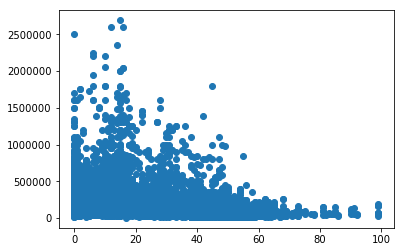

In [2]:
#df = df.drop(df.index[df['age'] == 99])
plt.scatter(df['age'], df['monthly_rent'])

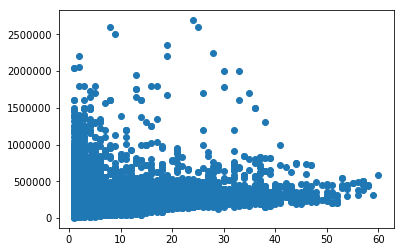

In [3]:
plt.scatter(df['floor'], df['monthly_rent'])
plt.show()

In [4]:
df = df.drop(df.index[df['floor_plan'] > 9 ])
df = df.drop(df.index[df['floor'] > 70])

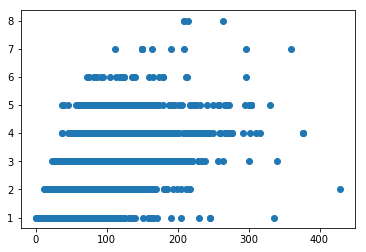

In [5]:
plt.scatter(df['surface'], df['floor_plan'])
plt.show()

In [6]:
df = df.drop(df.index[df['surface'] > 320])

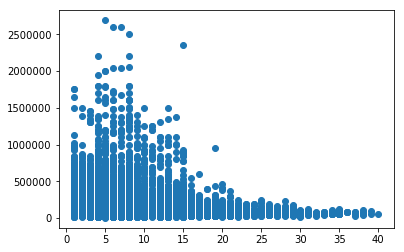

In [7]:
df = df.drop(df.index[(df['walk_min1'] > 40) ])
plt.scatter(df['walk_min1'], df['monthly_rent'])
plt.show()

In [8]:
ward = pd.get_dummies(df['ward'])

In [9]:
df_o = df[['floor_plan', 'plan_DK','plan_L','plan_K','plan_S','age','story', 'floor','surface','walk_min1', 'monthly_rent']]
df_o = pd.merge(df_o, ward, left_index=True, right_index=True)
df_o = df_o.dropna()
label = df_o['monthly_rent']
df_o.drop(['monthly_rent'], axis=1, inplace=True) 
data = df_o
data.head()

,floor_plan,plan_DK,plan_L,plan_K,plan_S,age,story,floor,surface,walk_min1,...,江戸川,江東,渋谷,港,目黒,練馬,荒川,葛飾,豊島,足立
0,1,0,0,0,0,6.0,2.0,1.0,4.33,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,47.0,5.0,5.0,9.72,5,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,47.0,5.0,5.0,9.72,5,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,47.0,5.0,5.0,9.72,5,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,37.0,11.0,3.0,17.70,4,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#params = [{"n_estimators": [10, 100, 300]}]
#clf = GridSearchCV(ensemble.RandomForestRegressor(), params)
data_train, data_test, label_train, label_test = \
    model_selection.train_test_split(data, label, test_size=0.20)

n_est = [10, 50, 100, 150, 250]
#n_est = [150]
for est in n_est:
    
    clf = ensemble.RandomForestRegressor(n_estimators=est)
    clf.fit(data_train, label_train)
    print(est)
    print(clf.score(data_train, label_train))
    print(clf.score(data_test, label_test))

KeyboardInterrupt: 

In [12]:
clf = ensemble.RandomForestRegressor(100)
clf.fit(data_train, label_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
from sklearn.externals import joblib

joblib.dump(clf, 'all_rent_monthly_rent.pkl')

['all_rent_monthly_rent.pkl']

In [13]:

test_reindex = pd.merge(data_test, label_test.to_frame(), left_index=True, right_index=True)
test_reindex = test_reindex.sort_values(by='monthly_rent').reset_index()

del test_reindex['index']

test_reindex.head()

,floor_plan,plan_DK,plan_L,plan_K,plan_S,age,story,floor,surface,walk_min1,...,江東,渋谷,港,目黒,練馬,荒川,葛飾,豊島,足立,monthly_rent
0,1,0,0,0,0,44.0,2.0,1.0,13.20,7,...,0,0,0,0,0,0,0,0,0,10000.0
1,1,0,0,0,0,41.0,2.0,2.0,13.77,7,...,0,0,0,0,0,0,0,0,0,20000.0
2,1,0,0,1,0,50.0,2.0,2.0,13.93,7,...,0,0,0,0,0,0,0,0,0,20000.0
3,1,0,0,0,0,48.0,2.0,2.0,9.00,4,...,0,0,0,0,0,0,0,0,0,20000.0
4,1,0,0,0,0,56.0,2.0,2.0,12.00,3,...,0,0,0,0,0,0,0,1,0,20000.0


In [14]:
Y  = test_reindex['monthly_rent']
test_reindex.drop(['monthly_rent'], axis=1, inplace=True)
X = test_reindex

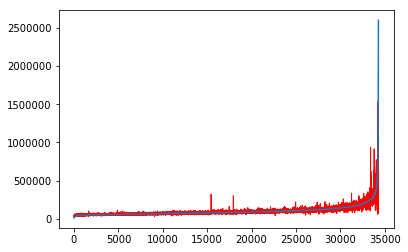

In [15]:
plt.plot(X.index, clf.predict(X), color='red', linewidth=1)
plt.plot(test_reindex.index, Y)
plt.show()

In [16]:
residual_RF = (Y-clf.predict(X))**2
residual_RF_total = residual_RF.sum()
#print(mean_absolute_error(Y, clf.predict(X)))
print(residual_RF_total)

1.41573347211e+13


In [18]:
residual_RF = (label - clf.predict(data))**2
residual_RF_total = residual_RF.sum()
#print(mean_absolute_error(Y, clf.predict(X)))
print(residual_RF_total)

2.21165788971e+13
